# PREPOZNAVANJE SAOBRACAJNIH ZNAKOVA

Skup podataka o slikama sastoji se od vise od 30 000 slika razlicitih saobracajnih znakova. Prisutne su 43 razlicite klase  u skupu podataka za klasifikaciju slika.

- **0** 'Ogranicenje brzine (20km/h)  **1** 'Ogranicenje brzine (30km/h)'
- **2** 'Ogranicenje brzine (50km/h)' **3** 'Ogranicenje brzine (60km/h)'
- **4** 'Ogranicenje brzine (70km/h)') **5** 'Ogranicenje brzine (80km/h)'
- **6** 'Prestanak ogranicenja brzine (80km/h)' **7** 'Ogranicenje brzine (100km/h)'
- **8** 'Ogranicenje brzine (120km/h)' **9** Zabrana preticanja za motorna vozila'
- **10** 'Zabrana preticanja za teretna vozila'
- **11** 'Spajanje sa sporednim putem pod pravim uglom sa desne strane' **12** 'Put sa prvenstvom prolaza'
- **13** 'Ukrstanje sa putem sa prvenstvom prolaza' **14** 'Stop' **15** 'Zabrana saobracaja u oba smera'
- **16** 'Zabrana saobracaja za teretna vozila') **17** 'Zabrana saobracaja u jednom smeru'
- **18** 'Opasnost na putu') **19** 'Krivina nalevo' **20** 'Krivina nadesno' 
- **21** 'Dvostruka krivina' **22** 'Neravan kolovoz' **23** 'Klizav kolovoz'
- **24** Suzenje puta sa desne strane' **25** 'Radovi na putu'
- **26** Nailazenje na semafor' **27** 'Pesaci na putu' **28** 'Deca na putu'
- **29** Biciklisti na putu' **30** 'Poledica/sneg' **31** 'Divljac na putu'
- **32** 'Prestanak svih zabrana' **33** 'Obavezan smer - poludesno'
- **34** 'Obavezan smer - polulevo' **35** 'Obazvezan smer - pravo' **36** 'Dozvoljeni smerovi (pravo ili desno)'
- **37** Dozvoljeni smerovi (pravo ili levo)' 
- **38** 'Obavezno obilazenje s desne strane' **39** 'Obavezno obilazenje s leve strane' **40** Kruzni tok saobracaja' 
- **41** 'Prestanak zabrane preticanja svih motornih vozila, osim motocikala bez prikolice'
- **42** Prestanak zabrane preticanja za teretna vozila'

Ucitavanje biblioteka.

In [1]:
import pickle
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras import utils

Ucitavanje skupa podataka.

In [4]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

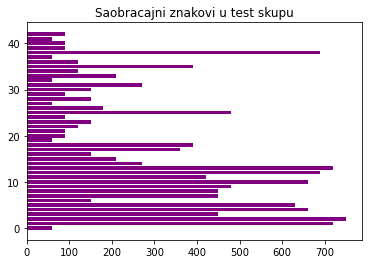

In [8]:
plt.title('Saobracajni znakovi u test skupu')
plt.barh(np.arange(0, 43), np.bincount(y_test), color='purple')
plt.show()

Jedna instanca ucitanog skupa.

36

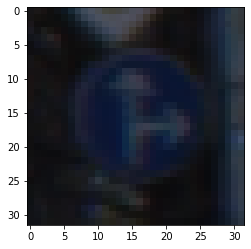

In [9]:
i = 1001
plt.imshow(X_train[i]) 
y_train[i]

In [10]:
X_train.shape

(34799, 32, 32, 3)

## PRIPREMA PODATAKA

In [11]:
# mesamo skup podataka
X_train, y_train = shuffle(X_train, y_train)

In [12]:
# prebacujemo slike u monohromatske
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [13]:
# a potom ih i normalizujemo
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
# primenicemo one-hot encoding na ciljnu promenljivu
y_train = utils.to_categorical(y_train, 43)
y_test = utils.to_categorical(y_test, 43)
y_validation = utils.to_categorical(y_validation, 43)

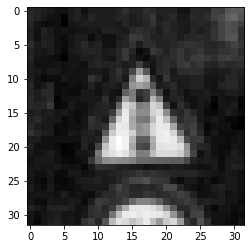

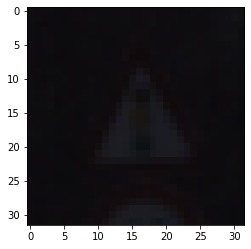

In [16]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.show()

In [17]:
image_shape = X_train_gray[i].shape
image_shape

(32, 32, 1)